# 1.Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import linear_model
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
Startups = pd.read_csv('50_Startups.csv')
Startups.columns=['RnD','Administration','Marketing','State','Profit']
Startups.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


We can see that R&D spend and marketing spend are positively correlated with profit.

In [3]:
Startups = Startups.drop('State', axis = 1)
Startups.head()

,RnD,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
#missing values
Startups.isna().sum()

RnD               0
Administration    0
Marketing         0
Profit            0
dtype: int64

In [5]:
Startups.shape

(50, 4)

In [6]:
Startups.describe()

,RnD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#correlation
Startups.corr()

,RnD,Administration,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   Profit          50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


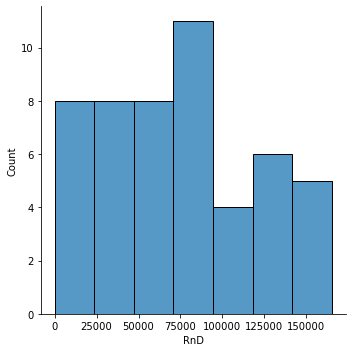

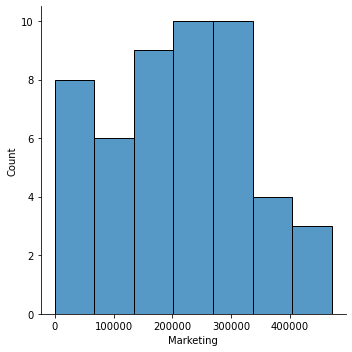

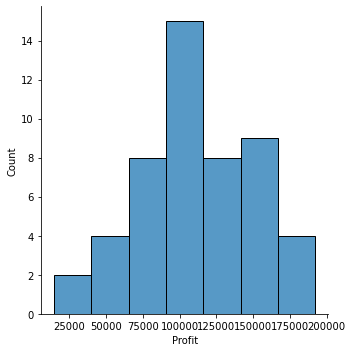

In [9]:
#visualization
sns.displot(Startups['RnD'])
sns.displot(Startups['Marketing'])
sns.displot(Startups['Profit'])

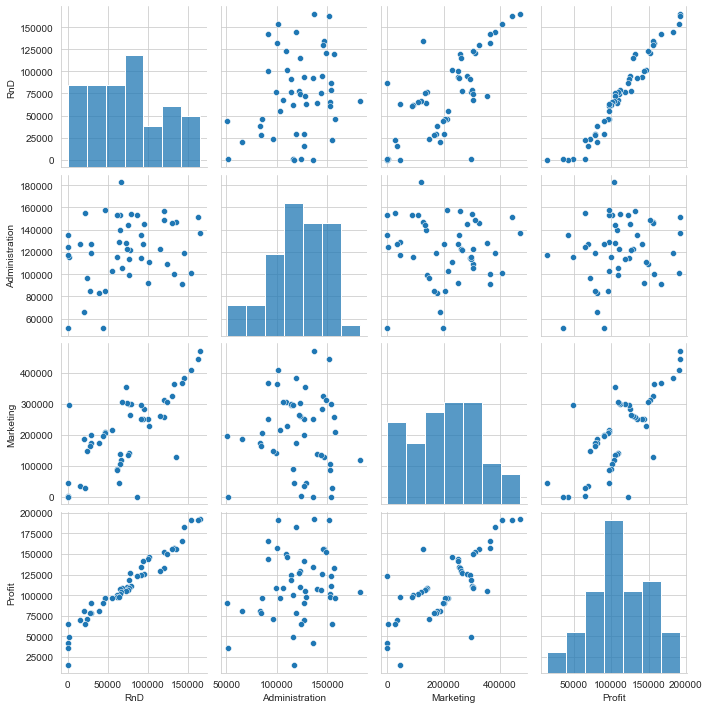

In [10]:
sns.set_style(style='whitegrid')
sns.pairplot(Startups)

<AxesSubplot:>

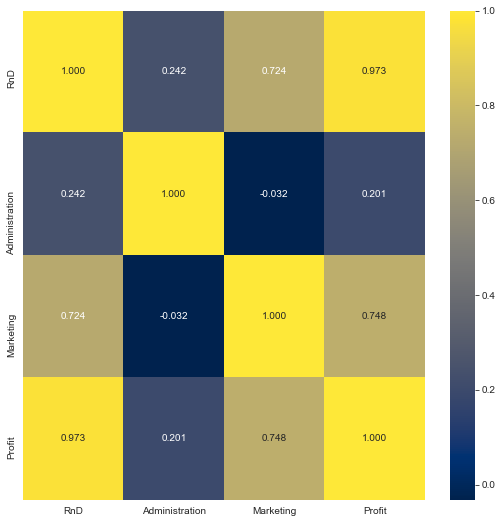

In [11]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(Startups.corr(), cmap='cividis', annot=True, fmt=".3f")

MODEL BUILDING

In [12]:
#By sklearn
x = Startups.drop(['Profit'], axis = 1).values
y = Startups.iloc[:, 3].values.reshape(-1,1)
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [13]:
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [14]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [16]:
model.rank_

3

In [17]:
model.intercept_

array([50122.19298987])

In [18]:
r2_score(y, model.predict(x))

0.9507459940683246

In [19]:
#Prediction
Startups1=pd.DataFrame({"RnD":152200,"Administration":155300,"Marketing":472000},index=[1]) 
model.predict(Startups1)
"The profit will be:",model.predict(Startups1)

('The profit will be:', array([[181439.15028132]]))

In [20]:
#Doing by Statsmodels
module = smf.ols("Profit~RnD+Administration+Marketing",data = Startups).fit()
print(module.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        19:25:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.

RESIDUAL ANALYSIS

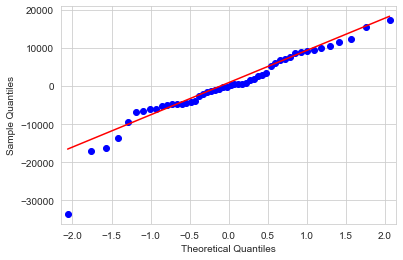

In [21]:
#Normality of Residuals (Q-Q plot)
qqplot=sm.qqplot(module.resid, line='q')

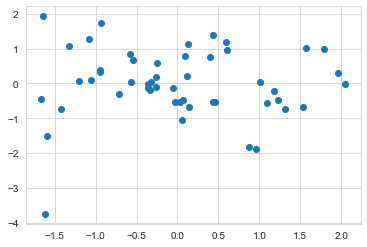

In [22]:
#Homoscedasticity by residual plot
def std(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter(std(module.fittedvalues), std(module.resid))

RESIDUAL vs REGRESSORS

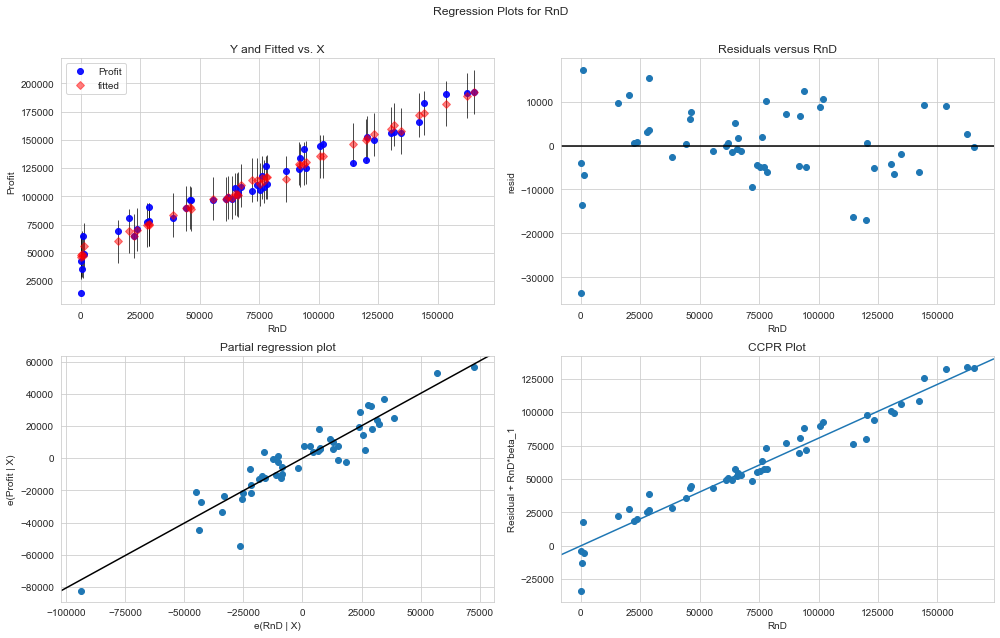

In [23]:
fig = plt.figure(figsize=(14,9))
fig = sm.graphics.plot_regress_exog(module, "RnD", fig=fig)

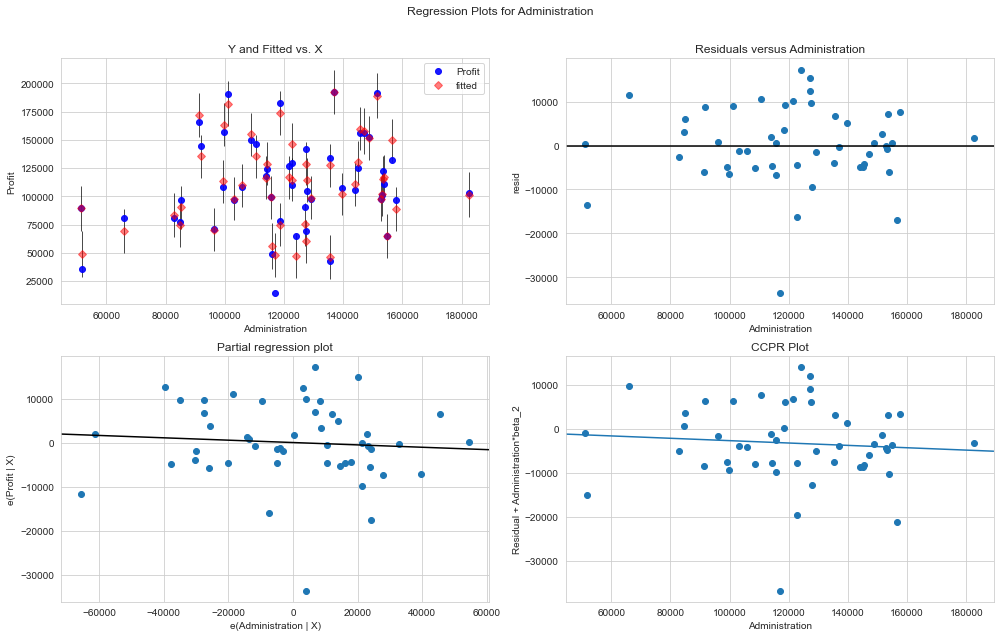

In [24]:
fig = plt.figure(figsize=(14,9))
fig = sm.graphics.plot_regress_exog(module, "Administration", fig=fig)

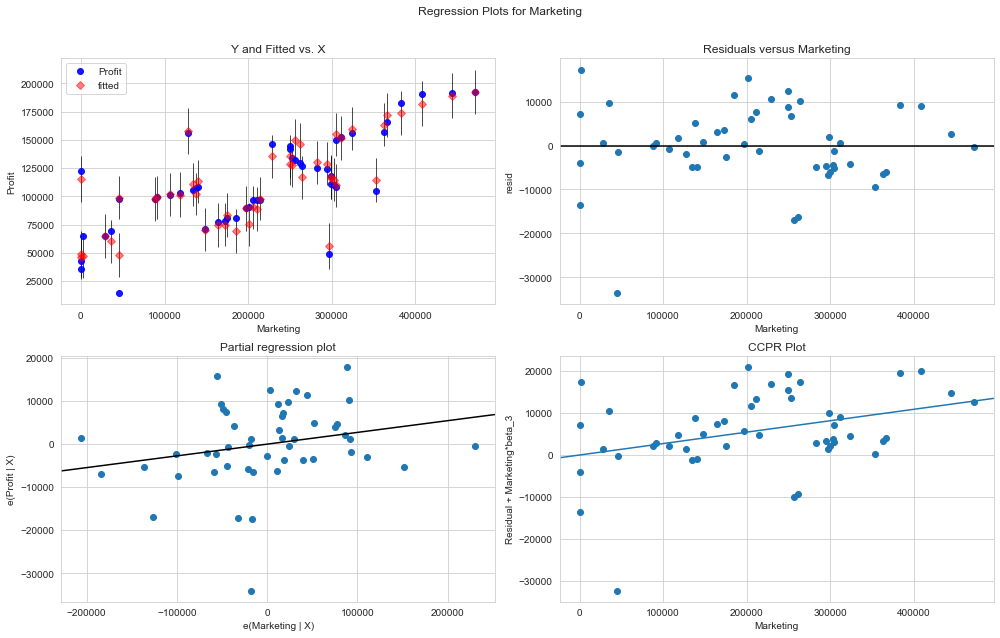

In [25]:
fig = plt.figure(figsize=(14,9))
fig = sm.graphics.plot_regress_exog(module, "Marketing", fig=fig)

MODEL DELETION DIAGNOSTICS

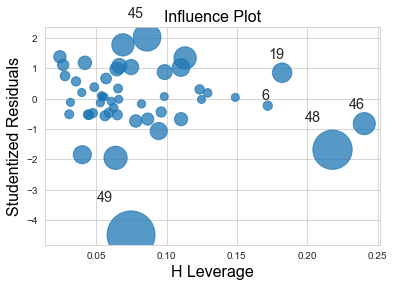

In [26]:
#Now we are detecting Outliers

module_influence = module.get_influence()
(c, _) = module_influence.cooks_distance
influence_plot(module)
plt.show()

In [27]:
#Value of influencer (c > 0.5)
np.argmax(c),np.max(c)

(49, 0.2880822927543267)

therefore, we don't need diagnostic process since the value is < 1. So finalize the model

In [28]:
#r-squared
module.rsquared, module.aic

(0.9507459940683246, 1058.7714985998055)

In [29]:
#parameters
module.params

Intercept         50122.192990
RnD                   0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

CONCLUSION

Y = 50122.2 +0.80571505X1 -0.02681597X2 +0.02722806X3 is the best model


# 2. Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [30]:
Corolla = pd.read_csv('ToyotaCorolla.csv')
Corolla = Corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [31]:
#missing values
Corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [32]:
Corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [33]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [34]:
Corolla.shape

(1436, 9)

In [35]:
#Correlation
Corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


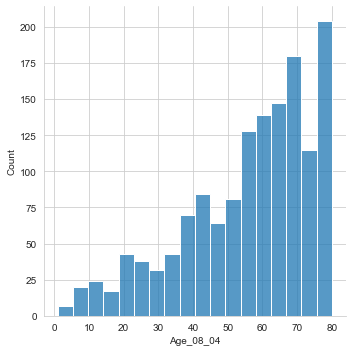

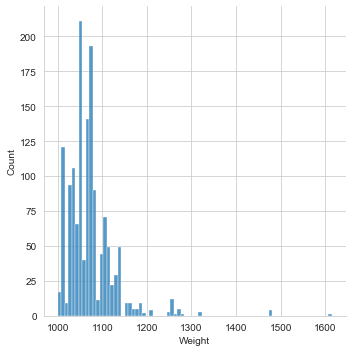

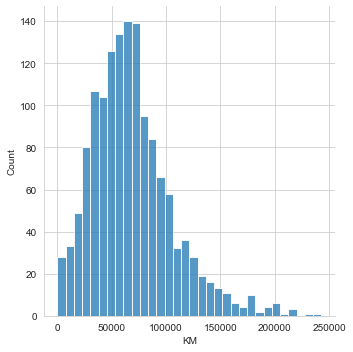

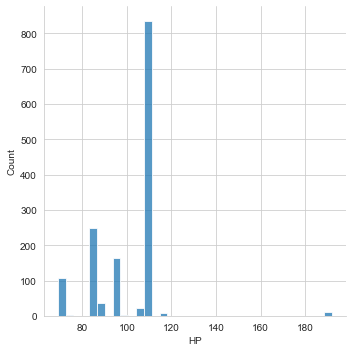

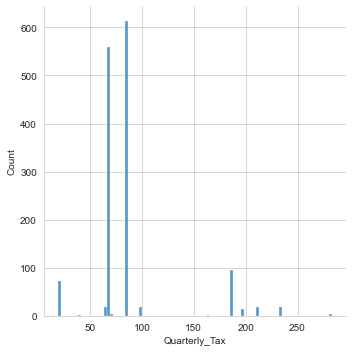

In [36]:
#Visualization
sns.displot(Corolla['Age_08_04'])
sns.displot(Corolla['Weight'])
sns.displot(Corolla['KM'])
sns.displot(Corolla['HP'])
sns.displot(Corolla['Quarterly_Tax'])

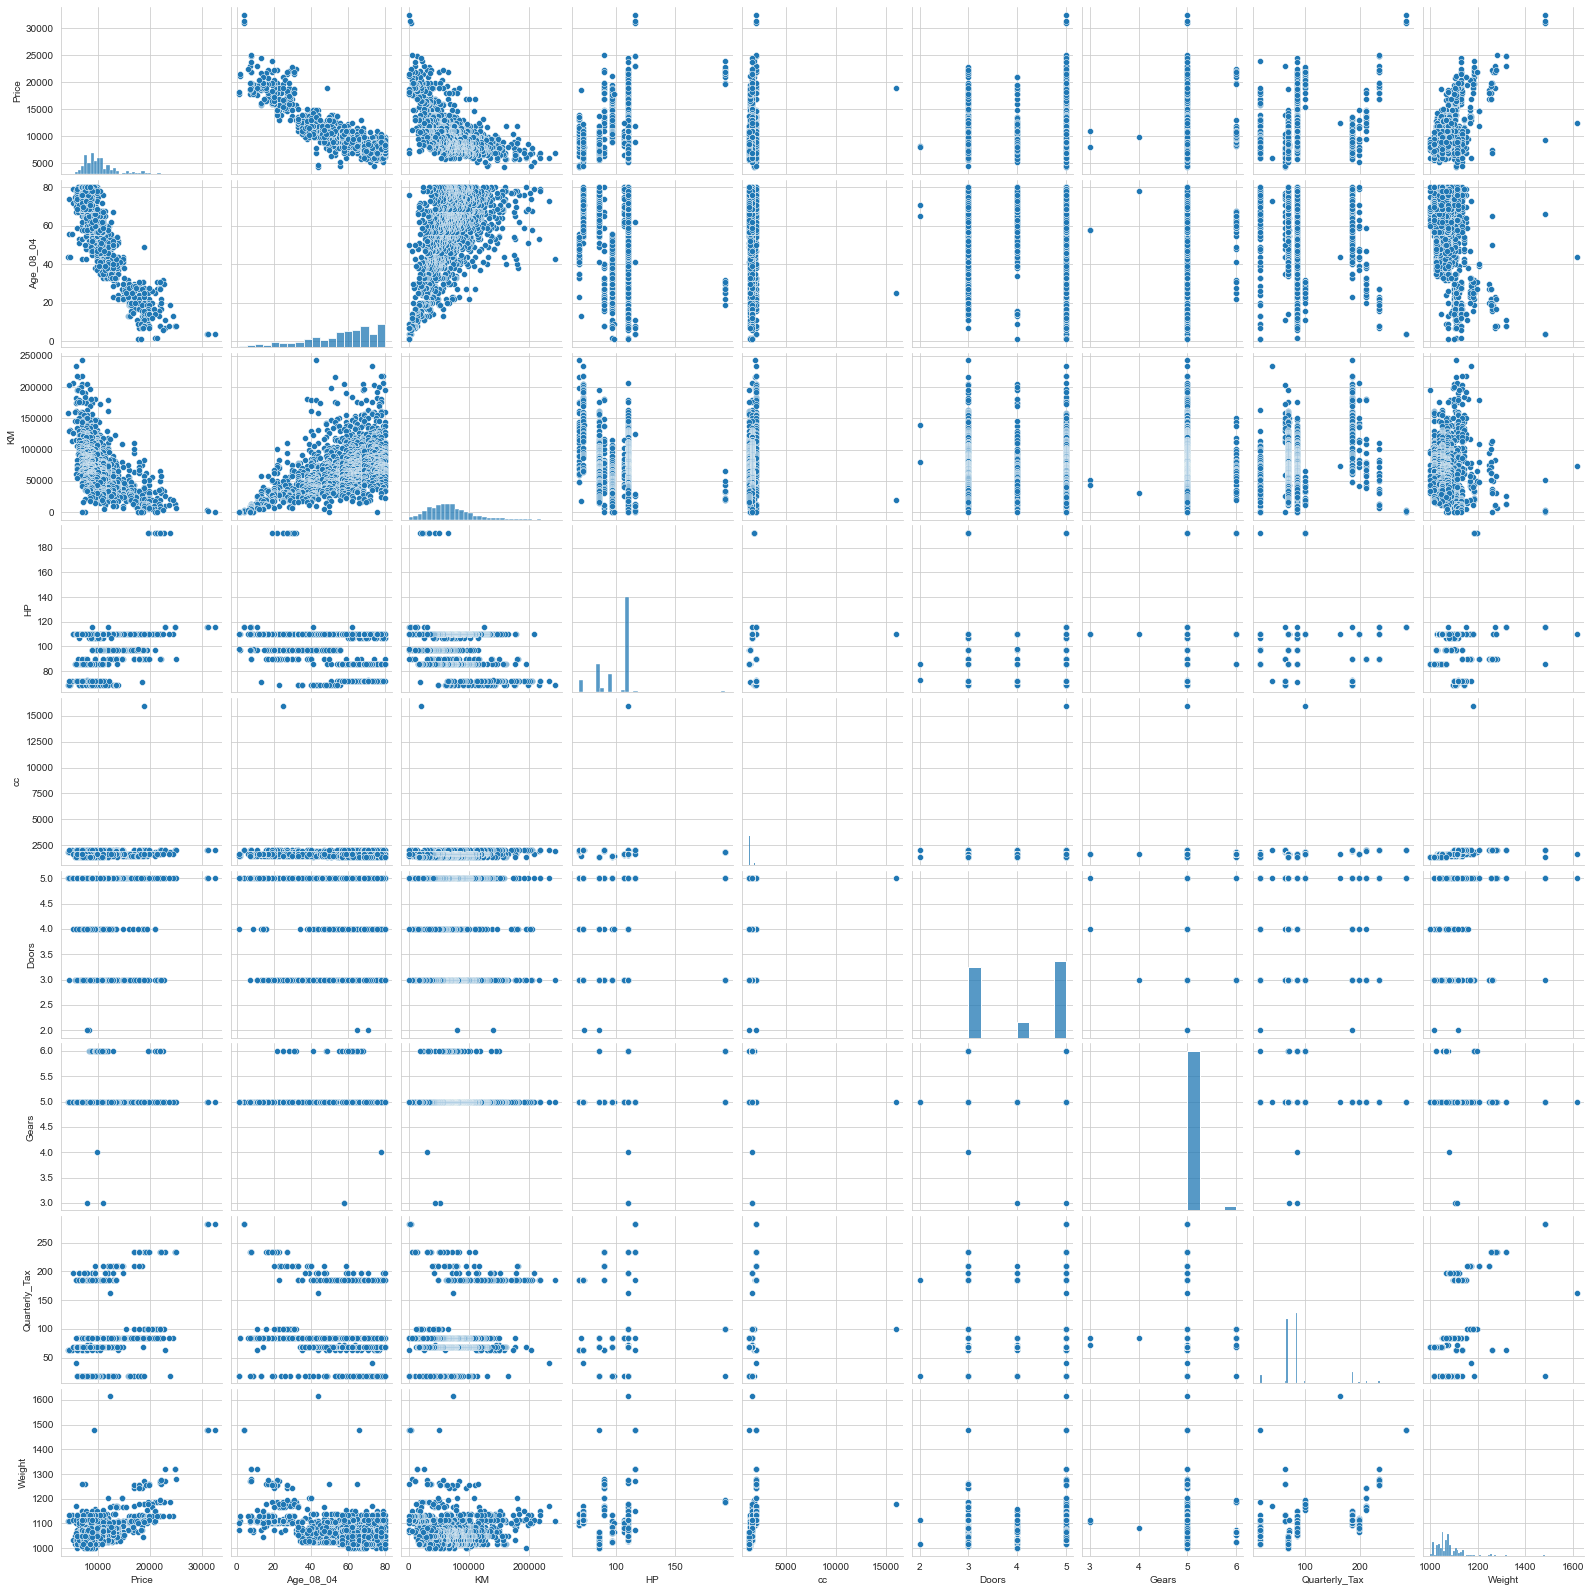

In [37]:
sns.set_style(style='whitegrid')
sns.pairplot(Corolla)

<AxesSubplot:>

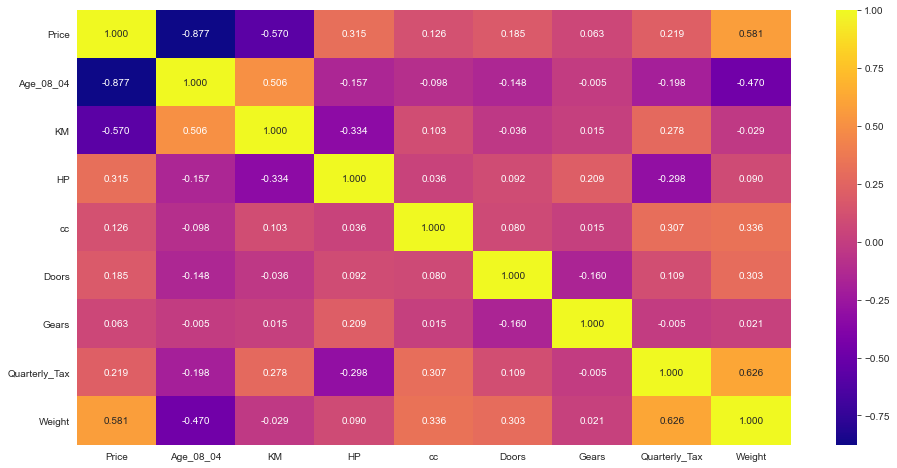

In [38]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(Corolla.corr(), cmap='plasma', annot=True, fmt='.3f')

MODEL BUILDING

In [39]:
#By sklearn
x=Corolla.drop('Price', axis=1).values
y=Corolla.iloc[:, 0].values.reshape(-1,1)
x

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]], dtype=int64)

In [40]:
y

array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]], dtype=int64)

In [41]:
#Data splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (1077, 8)
Shape of x_test: (359, 8)
Shape of y_train: (1077, 1)
Shape of y_test: (359, 1)


In [42]:
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train)

LinearRegression()

In [43]:
#predicting crsoss validation score of test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train, cv = 10)

#predicting R2 score of train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)


#predicting R2 score of test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

#predicting RMSE of test set results
rmse_linear =  (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print('CV:', cv_linear.mean())
print('R2_Score (train):', r2_score_linear_train)
print('R2_Score (test):', r2_score_linear_test)
print('RMSE:', rmse_linear)


CV: 0.7719638138218408
R2_Score (train): 0.8640307618150082
R2_Score (test): 0.8614722799605136
RMSE: 1402.0810748973886


In [44]:
regressor_linear.coef_

array([[-1.21320641e+02, -2.01353093e-02,  2.95093022e+01,
        -7.75554068e-02,  2.06641923e+01,  5.83104153e+02,
         1.83035074e+00,  1.78505581e+01]])

In [45]:
regressor_linear.rank_

8

In [46]:
regressor_linear.intercept_

array([-6263.01172068])

In [47]:
#Prediction
Corolla1 = pd.DataFrame({'Age_08_04':32, 'KM':38500, 'HP':78, 'cc':1500, 'Doors':3, 'Gears':5, 'Quarterly_Tax':200, 'Weight':1200}, index=[1])
regressor_linear.predict(Corolla1)
print('Price will be:', regressor_linear.predict(Corolla1))

Price will be: [[16029.16408435]]


In [48]:
model = smf.ols(formula='Price ~ Age_08_04 + Weight + KM + cc + Doors + Gears + HP + Quarterly_Tax',data=Corolla).fit()
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
Weight             16.958632
KM                 -0.020817
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
HP                 31.680906
Quarterly_Tax       3.949081
dtype: float64

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:25:30   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
HP               31.6809      2.818     11.241      0.000      26.152      37.209
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

VIF

In [50]:
rsq_km = smf.ols('KM ~ Age_08_04 + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data= Corolla).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('HP ~ Age_08_04 + KM + cc + Doors + Gears + Quarterly_Tax + Weight', data= Corolla).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_cc = smf.ols('cc ~ Age_08_04 +KM +HP + Doors + Gears + Quarterly_Tax + Weight', data= Corolla).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_doors = smf.ols('Doors ~ Age_08_04 + KM + HP + cc + Gears + Quarterly_Tax + Weight', data= Corolla).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears ~ Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax + Weight', data= Corolla).fit().rsquared  
vif_gears = 1/(1-rsq_gears) 

rsq_tax = smf.ols('Quarterly_Tax ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight', data= Corolla).fit().rsquared  
vif_tax = 1/(1-rsq_tax)

rsq_weight = smf.ols('Weight ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax', data= Corolla).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 

rsq_age = smf.ols('Age_08_04 ~ KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data= Corolla).fit().rsquared  
vif_age = 1/(1-rsq_age) 

# Storing VIF values
D1 = {'Variables':['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight'], 'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_tax, vif_weight]}
Vif_frame = pd.DataFrame(D1)  
Vif_frame 

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


RESIDUAL ANALYSIS

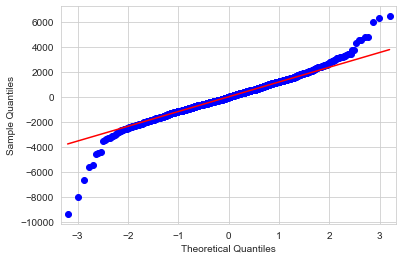

In [51]:
#Normality of residuals(Q-Q plot)
qqplot = sm.qqplot(model.resid,line='q')


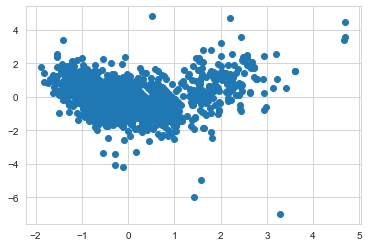

In [52]:
#Homoscedasticity
def a(vals):
    return(vals-vals.mean())/vals.std()

plt.scatter(a(model.fittedvalues), a(model.resid))

RESIDUAL vs REGRESSORS

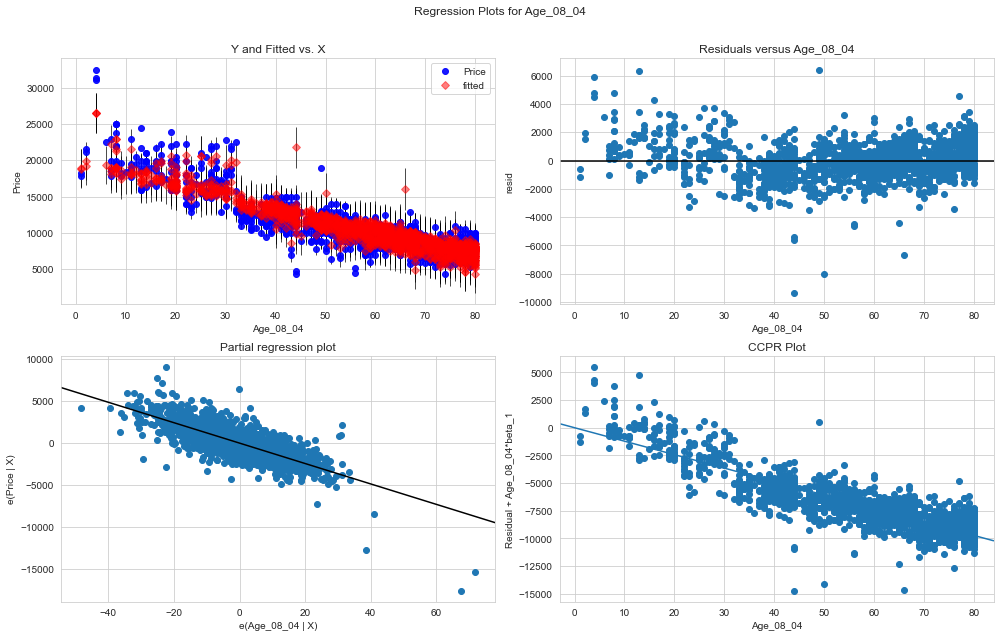

In [53]:
fig = plt.figure(figsize=(14, 9))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)

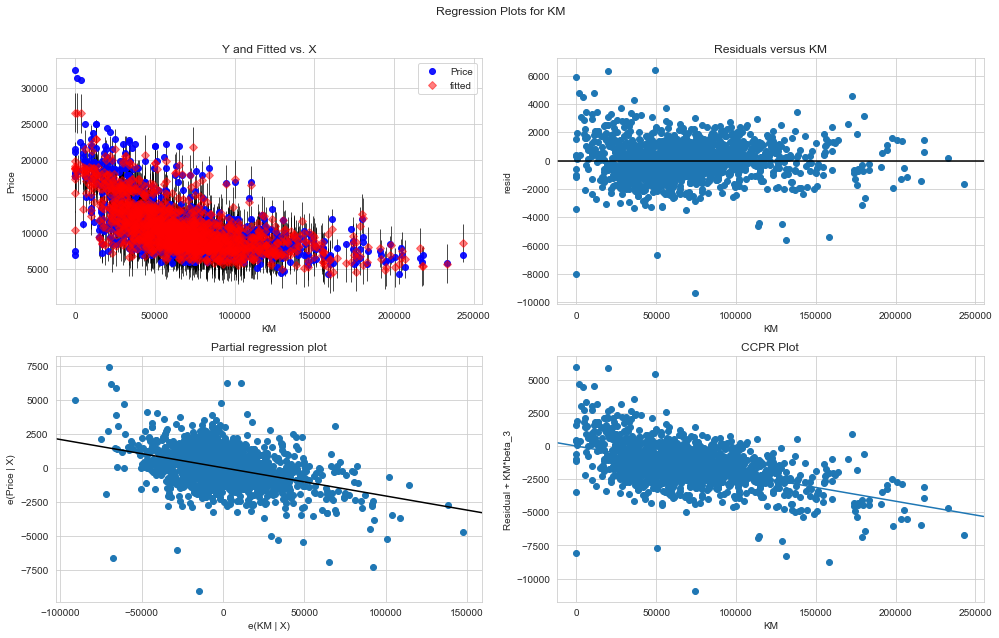

In [54]:
fig = plt.figure(figsize=(14, 9))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)

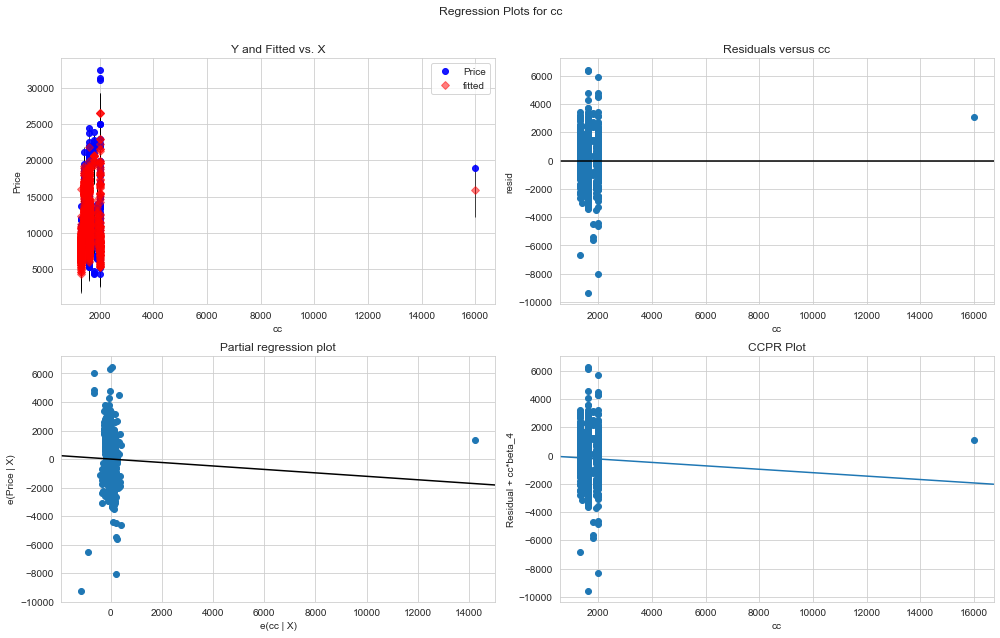

In [55]:
fig = plt.figure(figsize=(14, 9))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)

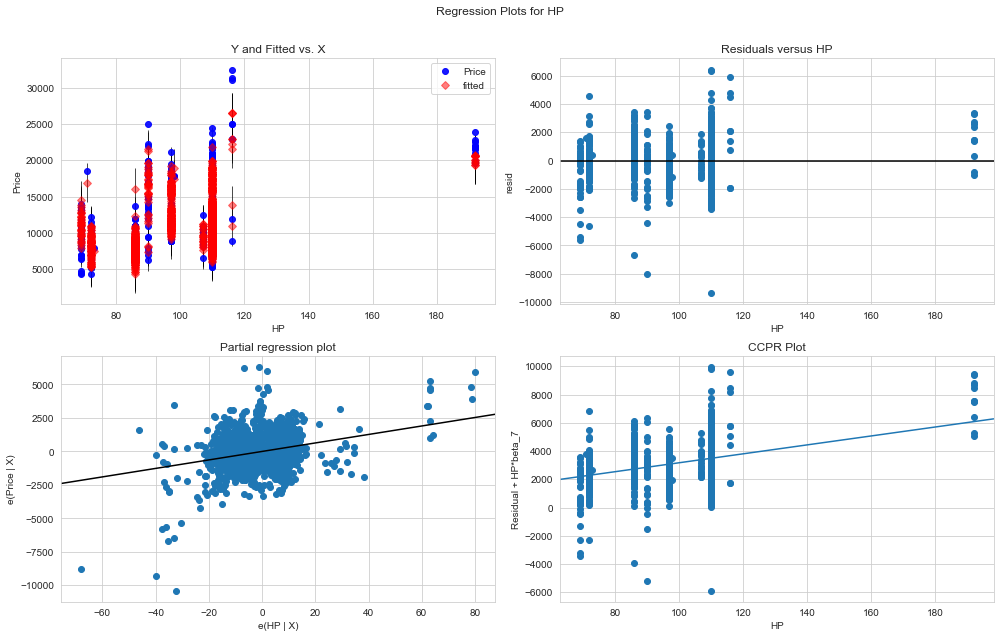

In [56]:
fig = plt.figure(figsize=(14, 9))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)

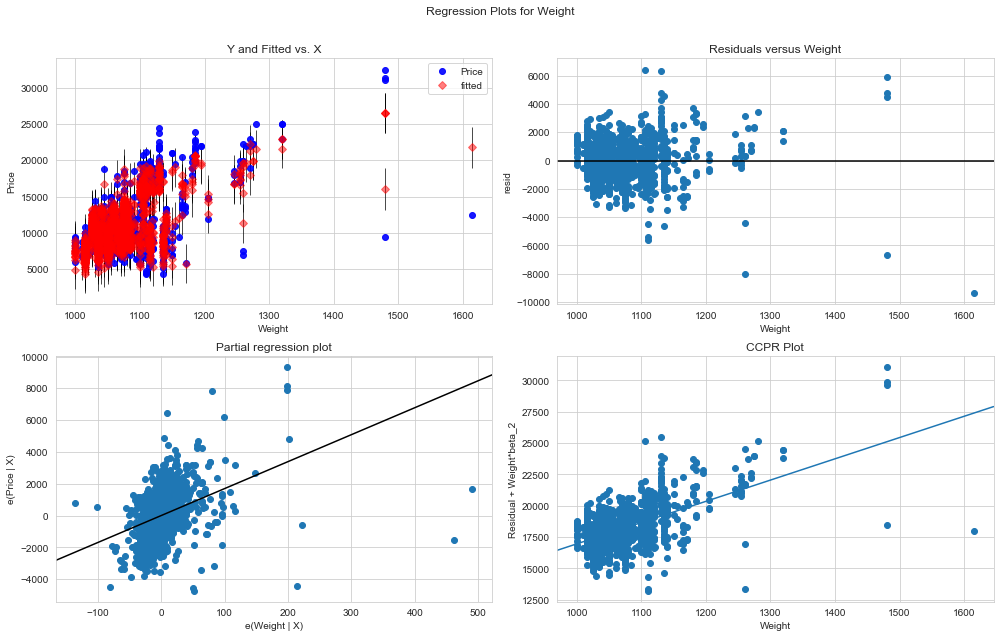

In [57]:
fig = plt.figure(figsize=(14, 9))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)

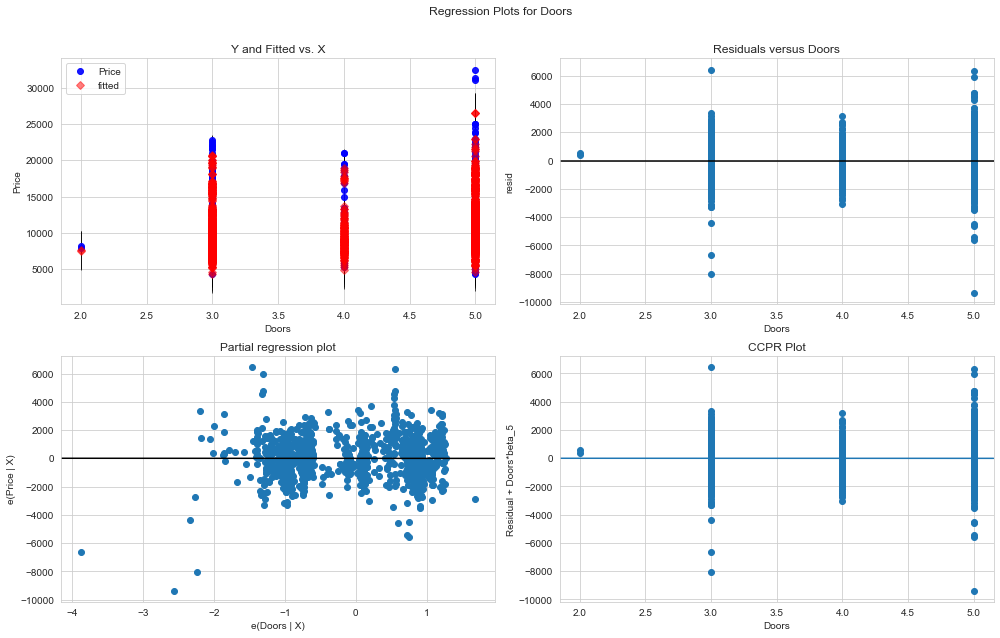

In [58]:
fig = plt.figure(figsize=(14, 9))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)

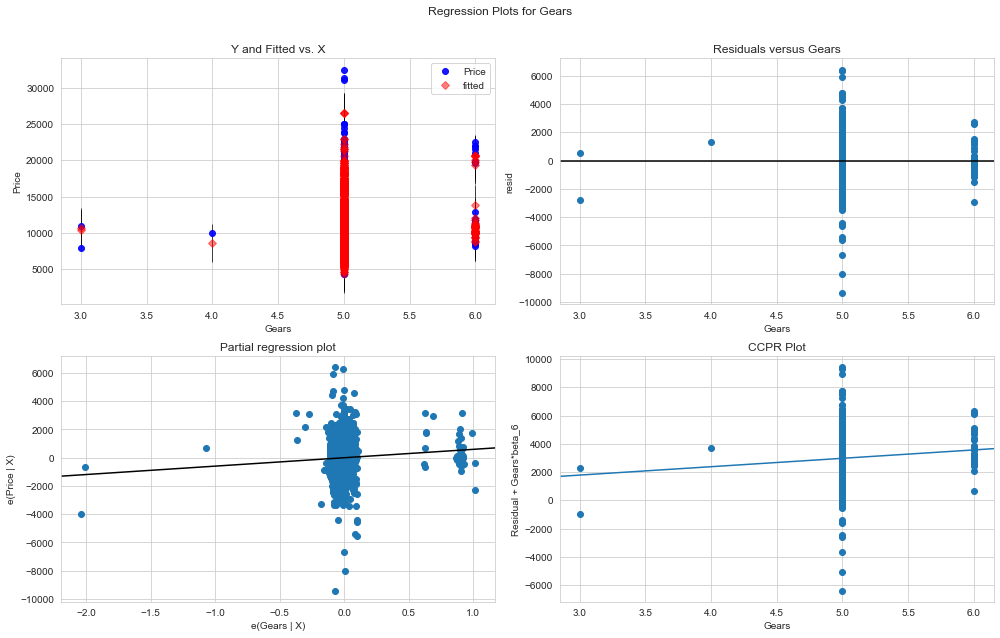

In [59]:
fig = plt.figure(figsize=(14, 9))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)

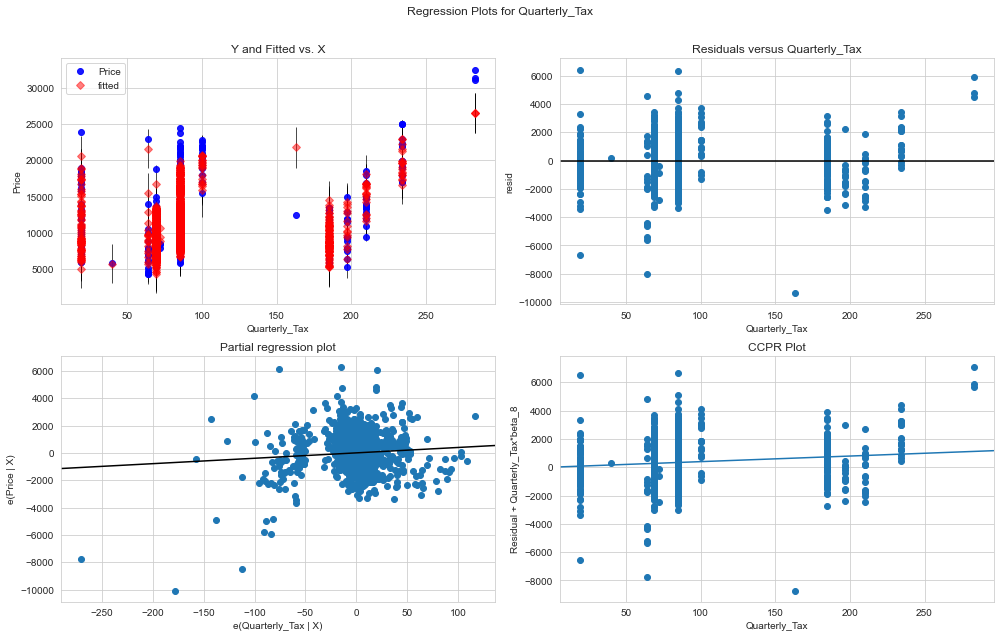

In [60]:
fig = plt.figure(figsize=(14, 9))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)

MODEL DELETION DIAGNOSTICS

Text(0, 0.5, 'Cooks Distance')

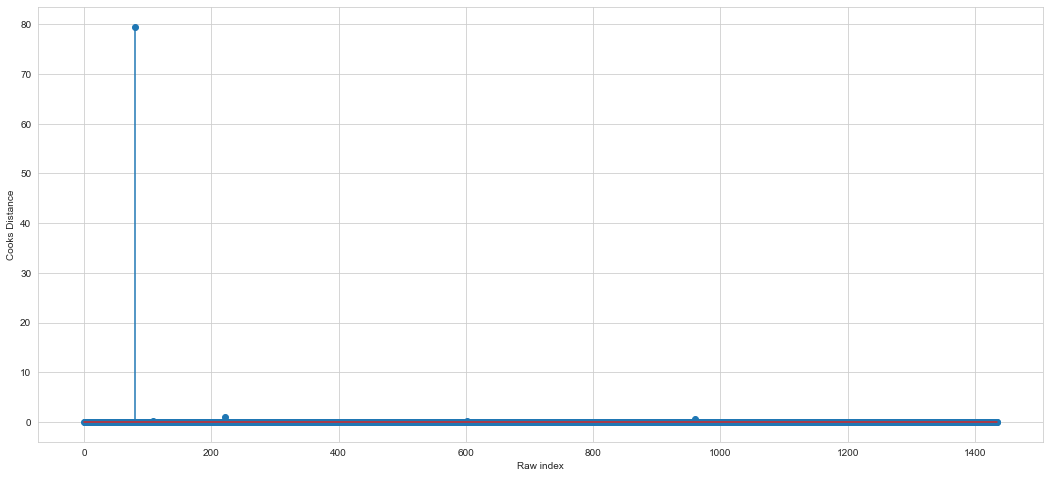

In [61]:
#Detecting Influencers/Outliers, Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.subplots(figsize=(18, 8))
plt.stem(np.arange(len(Corolla)), np.round(c, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')

In [62]:
#Value of influencer (c > 0.5)
np.argmax(c), np.max(c)

(80, 79.5201062414925)

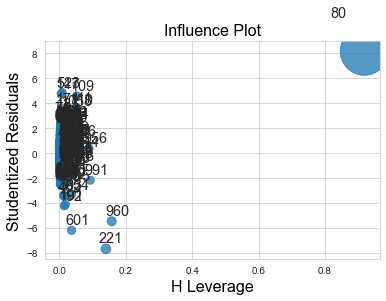

In [63]:
#High influence points
influence_plot(model)
plt.show()

Here we can see that data point 80 are the influencers

In [64]:
Corolla[Corolla.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [65]:
Corolla.head(85)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
80,18950,25,20019,110,16000,5,5,100,1180
81,17250,29,20000,110,1600,5,5,85,1115
82,15450,25,17003,97,1400,5,5,85,1110
83,17950,31,16238,110,1600,5,5,100,1180


We can see the differences in other variables

In [66]:
#let's improve the model
Corolla1 = Corolla.drop(Corolla.index[[80]], axis=0).reset_index()
Corolla1=Corolla1.drop(['index'], axis=1)
Corolla.head(85)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
80,18950,25,20019,110,16000,5,5,100,1180
81,17250,29,20000,110,1600,5,5,85,1115
82,15450,25,17003,97,1400,5,5,85,1110
83,17950,31,16238,110,1600,5,5,100,1180


In [67]:
model1 = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = Corolla1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:25:40   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Cooks Distance')

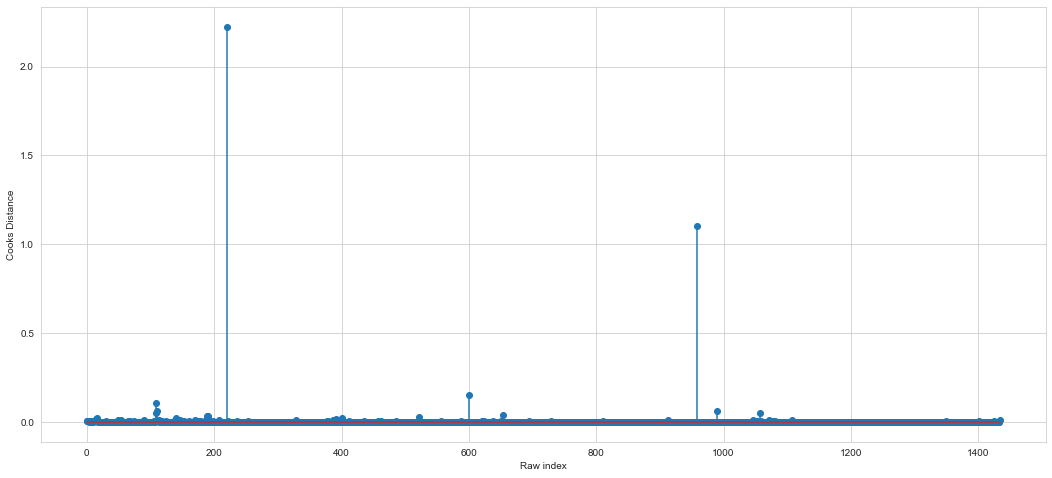

In [68]:
model1_influence = model1.get_influence()
(c1, _) = model1_influence.cooks_distance

fig = plt.subplots(figsize=(18, 8))
plt.stem(np.arange(len(Corolla1)), np.round(c1, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')

In [69]:
#Value of influencer (C > 0.5)
np.argmax(c1), np.max(c1)

(220, 2.2244611713011637)

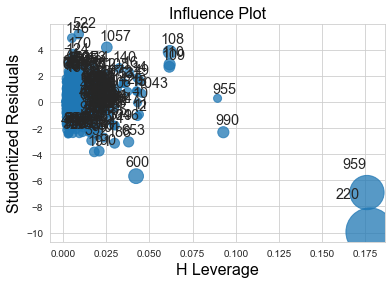

In [70]:
influence_plot(model1)
plt.show()

In [71]:
Corolla = Corolla1.drop(Corolla1.index[[220, 959]], axis=0).reset_index()
Corolla = Corolla.drop(['index'], axis=1)
Corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [72]:
model2 = smf.ols("Price~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = Corolla).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:25:43   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Cooks Distance')

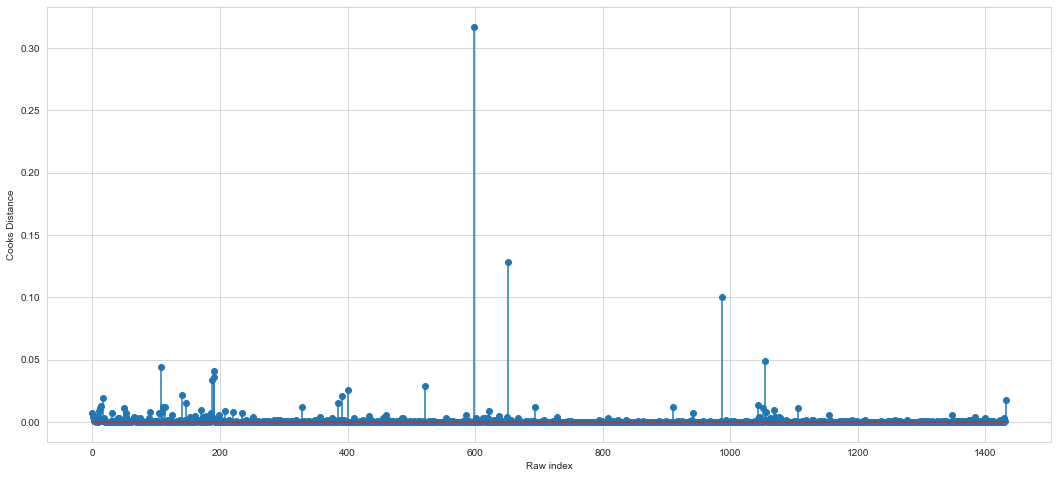

In [73]:
model2_influence = model2.get_influence()
(c2, _) = model2_influence.cooks_distance

fig = plt.subplots(figsize=(18, 8))
plt.stem(np.arange(len(Corolla)), np.round(c2, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')

In [74]:
#value of influencer (c > .5)
np.argmax(c2),np.max(c2)

(599, 0.31661315281442215)

So the value is <1. therefore we can finalize the model by stopping diagnostic process

In [75]:
#Accuracy
final_model = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data = Corolla).fit()
final_model.rsquared, final_model.aic

(0.8851845904421739, 24469.715205158594)

In [76]:
#prediction of new one
Corolla_new=pd.DataFrame({"Age_08_04":32, "KM":38500, "HP":78, "cc":1500, "Doors":3, "Gears":5, "Quarterly_Tax":200, "Weight":1200}, index=[1]) 
final_model.predict(Corolla_new)

1    17947.972059
dtype: float64

In [77]:
final_model.predict()

array([16333.27381415, 15892.32685024, 16310.88608064, ...,
        8644.94730242,  8758.66446182, 10641.52100191])

In [78]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:25:44   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
#parameters
final_model.params

Intercept       -14743.311719
Age_08_04         -112.018007
KM                  -0.016992
HP                  36.608402
cc                  -3.795426
Doors             -122.543739
Gears              464.983862
Quarterly_Tax        5.213440
Weight              30.639784
dtype: float64

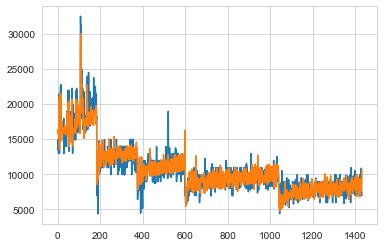

In [80]:
#Original vs predicted
plt.plot(Corolla.Price)
plt.plot(final_model.predict(Corolla))      
plt.show()

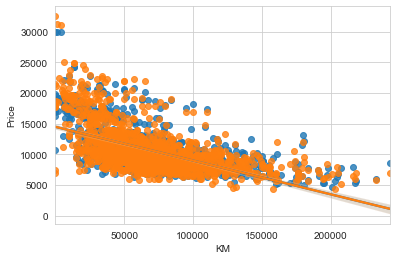

In [81]:
sns.regplot(Corolla.KM, final_model.predict(Corolla))
sns.regplot(Corolla.KM, Corolla.Price)
plt.show()

It is the comparison b/w original Data's Scatterlot and regressed model